In [6]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report
from sklearn.cross_validation import train_test_split,StratifiedKFold,cross_val_score

In [7]:
message=[line.rstrip() for line in open('SMSSpamCollection','r')]
for message_no,message in enumerate(message[:10]):
    print(message_no,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [8]:
message=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','SMS'])
message.head()
message.groupby('label').describe()
len(message['SMS'][1])

29

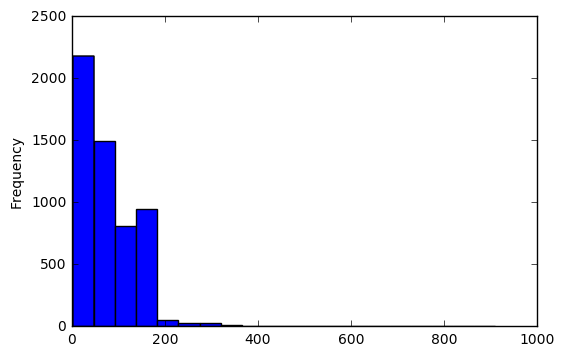

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [9]:
import matplotlib.pyplot as plt
message['length'] = message['SMS'].map(lambda text:len(text))
message.length.plot(bins = 20, kind = 'hist')
plt.show()
message.length.describe()

In [ ]:
# message.head()
# message.hist(column='length',by=['label','SMS'],bins=50)
# plt.show()

In [10]:
from textblob import TextBlob
def split_into_lemmas(messages):
    text=TextBlob(messages).words
    return [word.lemma for word in text]

bow_transformer=CountVectorizer(analyzer=split_into_lemmas).fit(message['SMS'])


In [11]:
print(bow_transformer.transform([message['SMS'][1]]))
print(bow_transformer.get_feature_names()[1])
print(bow_transformer.get_feature_names()[25])

  (0, 2557)	1
  (0, 3177)	1
  (0, 7633)	1
  (0, 8421)	1
  (0, 10339)	1
  (0, 10695)	1
'An
'm


In [12]:
message_boe=bow_transformer.transform(message['SMS'])
print('sparx_matrix shape:',message_boe.shape)
print('none zero:',message_boe.nnz)
print('sparsity %.2f%%'%(100 * message_boe.nnz/(message_boe.shape[0] * message_boe.shape[1])))

sparx_matrix shape: (5572, 11032)
none zero: 81553
sparsity 0.13%


In [13]:
tf_idf_transformer=TfidfTransformer().fit(message_boe)
print(tf_idf_transformer.transform(bow_transformer.transform( [message['SMS'][1]] ) ) )
#convert the entire dataset into the tf idf transformer
message_tf_idf=tf_idf_transformer.transform(message_boe)
print(message_tf_idf.shape)
print('now perform spam detector using multinomial detector :')
MNB=MultinomialNB().fit(message_tf_idf,message['label'])
print('let use the a particular message for testinf purpose')
print(MNB.predict(tf_idf_transformer.transform(bow_transformer.transform([message['SMS'][1]]))[0]))

  (0, 10695)	0.40108884077
  (0, 10339)	0.200805259029
  (0, 8421)	0.504936347182
  (0, 7633)	0.377185134866
  (0, 3177)	0.291543523313
  (0, 2557)	0.562652666483
(5572, 11032)
now perform spam detector using multinomial detector :
let use the a particular message for testinf purpose
['ham']


Axxuracy of all meassage: 0.972182340273
Confusion matrix: [[4825    0]
 [ 155  592]]


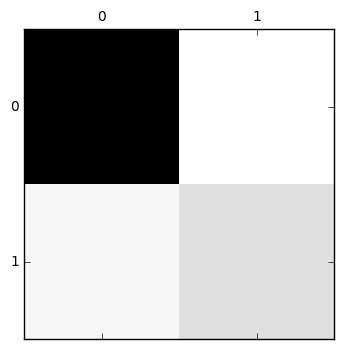

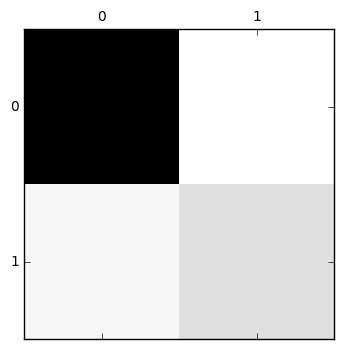

In [22]:
all_prediction=MNB.predict(message_tf_idf)
print('Axxuracy of all meassage:',accuracy_score(message['label'],all_prediction))
print('Confusion matrix:',confusion_matrix(message['label'],all_prediction))
plt.matshow(confusion_matrix(message['label'], all_prediction), cmap=plt.cm.binary, interpolation='nearest')
plt.show()